In [1]:
root_path = "/Users/danieldubovski/projects/deep_query_optimization"

import sys
import os
sys.path.insert(0, root_path)

In [2]:
# import tkinter
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib as mpl

plt_backend = mpl.get_backend()
print(plt_backend)
from matplotlib import pyplot as plt
import pandas as pd
from pandas import Panel
import numpy as np
import pytorch_lightning as pl
import torch
from importlib import reload 
from tqdm.auto import tqdm
from collections import Counter
import sklearn
import seaborn as sns
from sklearn import metrics as skm
import json
from dqo.estimator import evaluate as ge
from dqo.estimator.gerelt import v1, v2
from dqo import datasets

mpl.use(plt_backend)

module://ipykernel.pylab.backend_inline


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  # Remove the CWD from sys.path while we load stuff.


In [3]:
import importlib

importlib.reload(datasets)
importlib.reload(ge)
importlib.reload(v1)
importlib.reload(v2)


<module 'dqo.estimator.gerelt.v2' from '/Users/danieldubovski/projects/deep_query_optimization/dqo/estimator/gerelt/v2/__init__.py'>

# IMDB

In [4]:
imdb = datasets.QueriesDataset('imdb:optimized')
imdb_sample = imdb.sample(n=1000, strategy='bucketed')

2021-01-25 12:27:49,255 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/optimized/runtimes/data_part_00.csv [1/1]
2021-01-25 12:27:50,014 | dqo.datasets | INFO | Loaded 27512 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/optimized/runtimes/data_part_00.csv [1/1]


In [5]:
v1_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v1/logs/three_aug_default_adam/version_0/checkpoints/epoch=40.ckpt'), 
    dataset=imdb, 
    encoder=v1.encoder, 
    model_cls=v1.model.GereltRegressor
)
v2_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_1/checkpoints/epoch=60.ckpt'), 
    dataset=imdb, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
v3_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_3/checkpoints/epoch=1.ckpt'), 
    dataset=imdb, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)

In [18]:
v1_results = v1_estimater.evaluate(df=imdb_sample)

  8%|▊         | 75/954 [00:45<02:58,  4.94it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:227: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 954/954 [03:31<00:00,  4.52it/s]


In [24]:
v2_results = v2_estimater.evaluate(df=imdb_sample)

  8%|▊         | 75/954 [00:51<03:58,  3.69it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:227: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 954/954 [04:16<00:00,  3.73it/s]


In [10]:
v3_results = v3_estimater.evaluate(df=imdb_sample)

  8%|▊         | 75/954 [00:42<02:58,  4.94it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:227: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 954/954 [03:26<00:00,  4.62it/s]


1


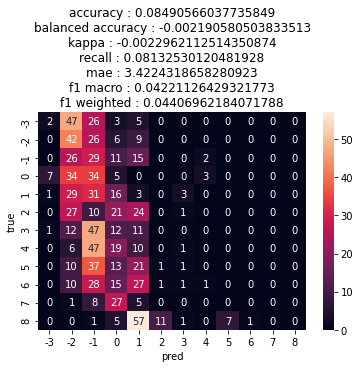

              precision    recall  f1-score   support

          -3       0.18      0.02      0.04        83
          -2       0.17      0.51      0.26        83
          -1       0.09      0.35      0.14        83
           0       0.03      0.06      0.04        83
           1       0.02      0.04      0.02        83
           2       0.00      0.00      0.00        83
           3       0.00      0.00      0.00        83
           4       0.00      0.00      0.00        83
           5       0.00      0.00      0.00        83
           6       0.00      0.00      0.00        83
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        83

    accuracy                           0.08       954
   macro avg       0.04      0.08      0.04       954
weighted avg       0.04      0.08      0.04       954

2
           abs_err               err_ratio            
              mean      median        mean      median
bucket               

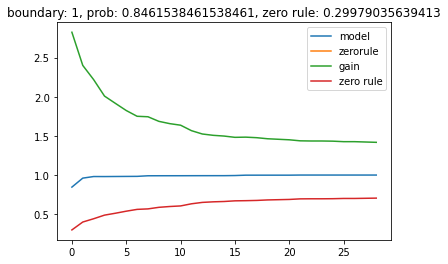

In [11]:
ge.display_results(v3_results)

1


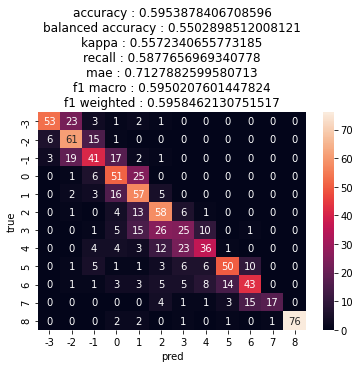

              precision    recall  f1-score   support

          -3       0.85      0.64      0.73        83
          -2       0.56      0.73      0.64        83
          -1       0.52      0.49      0.51        83
           0       0.49      0.61      0.54        83
           1       0.46      0.69      0.55        83
           2       0.50      0.70      0.59        83
           3       0.37      0.30      0.33        83
           4       0.58      0.43      0.50        83
           5       0.72      0.60      0.66        83
           6       0.62      0.52      0.57        83
           7       0.94      0.41      0.58        41
           8       1.00      0.92      0.96        83

    accuracy                           0.60       954
   macro avg       0.64      0.59      0.60       954
weighted avg       0.62      0.60      0.60       954

2
          abs_err             err_ratio          
             mean     median       mean    median
bucket                         

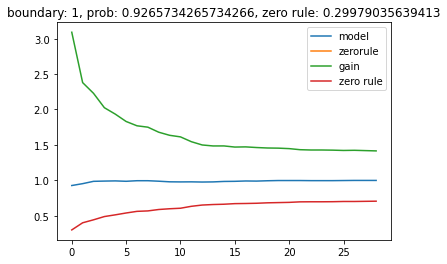

In [29]:
ge.display_results(v2_results)

## NUMBERS VS STRINGS

In [16]:
qe = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_1/checkpoints/epoch=60.ckpt'), 
    dataset=imdb, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
r = qe.evaluate(df=datasets.QueriesDataset('imdb:only_strings').load())
json.dumps(ge.evaluate_metrics(r))

2021-01-25 15:50:05,965 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_strings/runtimes/data_part_00.csv [1/1]
2021-01-25 15:50:05,970 | dqo.datasets | INFO | Loaded 47 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_strings/runtimes/data_part_00.csv [1/1]
100%|██████████| 47/47 [00:02<00:00, 20.69it/s]


'{"accuracy": 0.7659574468085106, "balanced accuracy": 0.785813492063492, "kappa": 0.7227882037533513, "recall": 0.8096119929453263, "mae": 0.23404255319148937, "f1 macro": 0.7920926205239931, "f1 weighted": 0.7689874094755195}'

In [17]:
qe = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_1/checkpoints/epoch=60.ckpt'), 
    dataset=imdb, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
r = qe.evaluate(df=datasets.QueriesDataset('imdb:only_numbers').load())
json.dumps(ge.evaluate_metrics(r))

2021-01-25 15:50:22,596 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_numbers/runtimes/data_part_00.csv [1/1]
2021-01-25 15:50:22,601 | dqo.datasets | INFO | Loaded 124 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_numbers/runtimes/data_part_00.csv [1/1]
100%|██████████| 124/124 [00:07<00:00, 16.15it/s]
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


'{"accuracy": 0.6854838709677419, "balanced accuracy": 0.5517496392496393, "kappa": 0.6316551146317313, "recall": 0.5413997113997114, "mae": 0.3870967741935484, "f1 macro": 0.5584700352153182, "f1 weighted": 0.6928782798457175}'

## RANDOM QUERIES

In [17]:
v1_results.predict_query('select MIN(id) from aka_title')

0.3487551234163082

In [60]:
v1_results.predict_query('select MIN(id) from aka_title, cast_info where aka_title.movie_id = cast_info.movie_id and cast_info.note like "%a%"')

11.159208242646764

In [61]:
v1_results.predict_query('select MIN(id) from aka_title, cast_info where aka_title.movie_id = cast_info.movie_id and aka_title.movie_id > 10')

26.097686612759194

In [62]:
v1_results.predict_query('select MIN(id) from aka_title, cast_info where aka_title.movie_id = cast_info.movie_id')

98.77698618825976

In [63]:
v1_results.predict_query('select MIN(id) from cast_info')

2.9044822055115933

# TPCD

In [9]:
tpcd = datasets.QueriesDataset('tpcd:optimized')
tpcd_sample = tpcd.sample(n=500, strategy='bucketed')

2021-01-25 15:43:24,216 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpcd/execution/optimized/runtimes/data_part_00.csv [1/1]
2021-01-25 15:43:24,757 | dqo.datasets | INFO | Loaded 23635 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpcd/execution/optimized/runtimes/data_part_00.csv [1/1]


In [21]:
tpcd_v1_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v1/logs/three_aug_default_adam/version_0/checkpoints/epoch=40.ckpt'), 
    dataset=tpcd, 
    encoder=v1.encoder, 
    model_cls=v1.model.GereltRegressor
)
tpcd_v2_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_1/checkpoints/epoch=60.ckpt'), 
    dataset=tpcd, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
tpcd_v22_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_2/checkpoints/epoch=40.ckpt'), 
    dataset=tpcd, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
tpcd_v23_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_2/checkpoints/epoch=27.ckpt'), 
    dataset=tpcd, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
imdb_v3_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_3/checkpoints/epoch=6.ckpt'), 
    dataset=imdb, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)

In [32]:
tpcd_v1_results = tpcd_v1_estimater.evaluate(df=tpcd_sample)

  4%|▍         | 19/467 [00:01<00:32, 13.59it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:227: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 467/467 [00:33<00:00, 14.02it/s]


In [ ]:
tpcd_v3_results = tpcd_v3_estimater.evaluate(df=tpcd_sample)

In [22]:
imdb_v3_results = imdb_v3_estimater.evaluate(df=imdb_sample)

  8%|▊         | 75/954 [00:43<02:57,  4.95it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:227: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 954/954 [03:25<00:00,  4.65it/s]


1


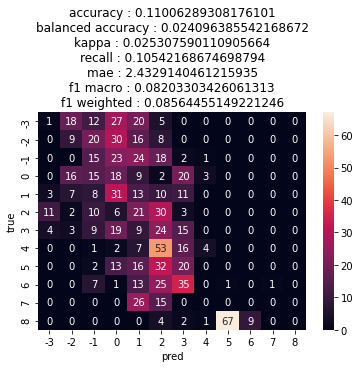

              precision    recall  f1-score   support

          -3       0.05      0.01      0.02        83
          -2       0.16      0.11      0.13        83
          -1       0.15      0.18      0.16        83
           0       0.11      0.22      0.14        83
           1       0.07      0.16      0.10        83
           2       0.13      0.36      0.19        83
           3       0.12      0.18      0.14        83
           4       0.44      0.05      0.09        83
           5       0.00      0.00      0.00        83
           6       0.00      0.00      0.00        83
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        83

    accuracy                           0.11       954
   macro avg       0.10      0.11      0.08       954
weighted avg       0.11      0.11      0.09       954

2
           abs_err              err_ratio           
              mean      median       mean     median
bucket                   

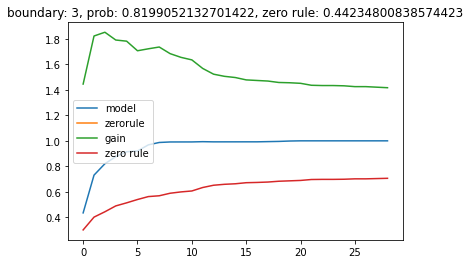

In [23]:
ge.display_results(imdb_v3_results)

1


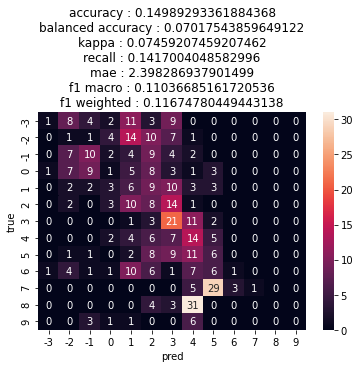

/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -3       0.33      0.03      0.05        38
          -2       0.03      0.03      0.03        38
          -1       0.32      0.26      0.29        38
           0       0.05      0.03      0.04        38
           1       0.09      0.16      0.11        38
           2       0.11      0.21      0.14        38
           3       0.24      0.55      0.33        38
           4       0.15      0.37      0.21        38
           5       0.11      0.16      0.13        38
           6       0.25      0.03      0.05        38
           7       1.00      0.03      0.05        38
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        11

    accuracy                           0.15       467
   macro avg       0.21      0.14      0.11       467
weighted avg       0.22      0.15      0.12       467

2
           abs_err               err_ratio           
              mean     

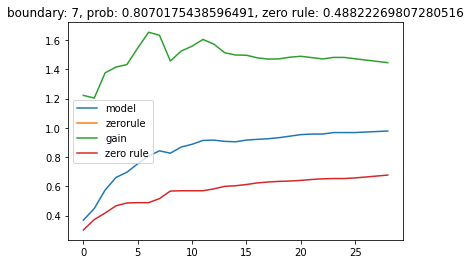

In [35]:
ge.display_results(tpcd_v1_results)

1


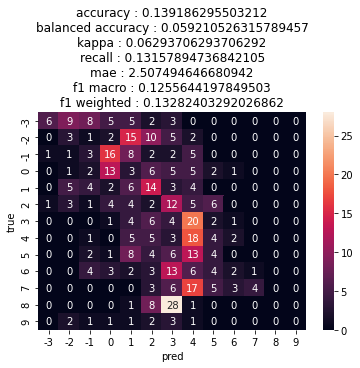

/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -3       0.75      0.16      0.26        38
          -2       0.12      0.08      0.10        38
          -1       0.11      0.08      0.09        38
           0       0.27      0.34      0.30        38
           1       0.10      0.16      0.12        38
           2       0.03      0.05      0.04        38
           3       0.04      0.11      0.06        38
           4       0.19      0.47      0.27        38
           5       0.15      0.11      0.12        38
           6       0.22      0.05      0.09        38
           7       0.80      0.11      0.19        38
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        11

    accuracy                           0.14       467
   macro avg       0.21      0.13      0.13       467
weighted avg       0.23      0.14      0.13       467

2
           abs_err               err_ratio            
              mean    

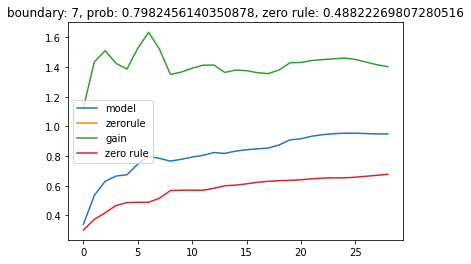

In [36]:
ge.display_results(tpcd_v2_results)

1


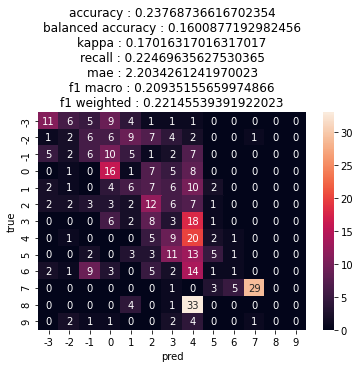

              precision    recall  f1-score   support

          -3       0.48      0.29      0.36        38
          -2       0.11      0.05      0.07        38
          -1       0.19      0.16      0.17        38
           0       0.28      0.42      0.33        38
           1       0.17      0.16      0.16        38
           2       0.21      0.32      0.26        38
           3       0.06      0.08      0.07        38
           4       0.15      0.53      0.23        38
           5       0.33      0.13      0.19        38
           6       0.12      0.03      0.04        38
           7       0.94      0.76      0.84        38
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        11

    accuracy                           0.24       467
   macro avg       0.23      0.22      0.21       467
weighted avg       0.25      0.24      0.22       467

2
           abs_err               err_ratio           
              mean     

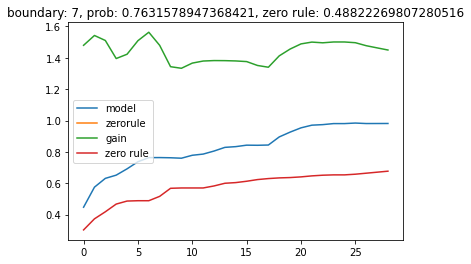

In [14]:
ge.display_results(tpcd_v23_results)

In [15]:
ge.evaluate_binary_split(ge.evaluate_results(tpcd_v23_results), 21)

(0.9531772575250836, 0.6402569593147751, 1.4887417366696123)

## STRINGS VS NUMBERS

In [15]:
cp = os.path.join(os.getcwd(), f'v2/logs/three_opt_default_adam/version_2/checkpoints/epoch=21.ckpt')
qe = ge.QueryEstimater(cp, dataset=tpcd, encoder=v2.encoder, model_cls=v2.model.GereltRegressor)
r = qe.evaluate(df=datasets.QueriesDataset('tpcd:only_strings').load())
json.dumps(ge.evaluate_metrics(r))

2021-01-25 15:46:42,897 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpcd/execution/only_strings/runtimes/data_part_00.csv [1/1]
2021-01-25 15:46:42,903 | dqo.datasets | INFO | Loaded 441 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpcd/execution/only_strings/runtimes/data_part_00.csv [1/1]
100%|██████████| 441/441 [00:19<00:00, 22.86it/s]


'{"accuracy": 0.2494331065759637, "balanced accuracy": 0.13010335252982314, "kappa": 0.08448840330653151, "recall": 0.1970184792582983, "mae": 1.655328798185941, "f1 macro": 0.17087896035264458, "f1 weighted": 0.2230672742667014}'

In [14]:
cp = os.path.join(os.getcwd(), f'v2/logs/three_opt_default_adam/version_2/checkpoints/epoch=21.ckpt')
qe = ge.QueryEstimater(cp, dataset=tpcd, encoder=v2.encoder, model_cls=v2.model.GereltRegressor)
r = qe.evaluate(df=datasets.QueriesDataset('tpcd:only_numbers').load())
json.dumps(ge.evaluate_metrics(r))

2021-01-25 15:45:08,109 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpcd/execution/only_numbers/runtimes/data_part_00.csv [1/1]
2021-01-25 15:45:08,113 | dqo.datasets | INFO | Loaded 222 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpcd/execution/only_numbers/runtimes/data_part_00.csv [1/1]
100%|██████████| 222/222 [00:08<00:00, 27.02it/s]


'{"accuracy": 0.18018018018018017, "balanced accuracy": 0.1985097640530351, "kappa": 0.057016827315798047, "recall": 0.27137251277548646, "mae": 2.036036036036036, "f1 macro": 0.1263105697701401, "f1 weighted": 0.13355821267205648}'

# Find Best Epoch

In [7]:
for i in tqdm(range(68)):
    cp = os.path.join(os.getcwd(), f'v2/logs/three_opt_default_adam/version_2/checkpoints/epoch={i}.ckpt')
    qe = ge.QueryEstimater(cp, dataset=tpcd, encoder=v2.encoder, model_cls=v2.model.GereltRegressor)
    r = qe.evaluate(df=tpcd_sample)
    print(i, json.dumps(ge.evaluate_metrics(r)))

  0%|          | 0/467 [00:00<?, ?it/s]

0 {"accuracy": 0.10920770877944326, "balanced accuracy": 0.02850877192982456, "kappa": 0.030303030303030276, "recall": 0.10323886639676114, "mae": 2.6188436830835116, "f1 macro": 0.07614491190070785, "f1 weighted": 0.08054729438747255}


  0%|          | 0/467 [00:00<?, ?it/s]

1 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.08333333333333333, "kappa": 0.08857808857808858, "recall": 0.15384615384615385, "mae": 2.4839400428265526, "f1 macro": 0.10621259260439878, "f1 weighted": 0.11235336348302571}


  0%|          | 0/467 [00:00<?, ?it/s]

2 {"accuracy": 0.15631691648822268, "balanced accuracy": 0.07675438596491228, "kappa": 0.08158508158508171, "recall": 0.14777327935222673, "mae": 2.372591006423983, "f1 macro": 0.11347999078133553, "f1 weighted": 0.12004093243250483}


  0%|          | 0/467 [00:00<?, ?it/s]

3 {"accuracy": 0.1905781584582441, "balanced accuracy": 0.1118421052631579, "kappa": 0.11888111888111885, "recall": 0.18016194331983806, "mae": 2.3683083511777303, "f1 macro": 0.1398747949296124, "f1 weighted": 0.14796177450798398}


  0%|          | 0/467 [00:00<?, ?it/s]

4 {"accuracy": 0.1841541755888651, "balanced accuracy": 0.10526315789473684, "kappa": 0.11188811188811187, "recall": 0.17408906882591094, "mae": 2.4775160599571735, "f1 macro": 0.13002499334754988, "f1 weighted": 0.1375424983162519}


  0%|          | 0/467 [00:00<?, ?it/s]

5 {"accuracy": 0.17558886509635974, "balanced accuracy": 0.09649122807017545, "kappa": 0.10256410256410253, "recall": 0.1659919028340081, "mae": 2.5032119914346893, "f1 macro": 0.13367299111561393, "f1 weighted": 0.14140140816084212}


  0%|          | 0/467 [00:00<?, ?it/s]

6 {"accuracy": 0.139186295503212, "balanced accuracy": 0.05921052631578949, "kappa": 0.06293706293706292, "recall": 0.13157894736842107, "mae": 2.4218415417558887, "f1 macro": 0.09970959214374522, "f1 weighted": 0.10547438655034293}


  0%|          | 0/467 [00:00<?, ?it/s]

7 {"accuracy": 0.1349036402569593, "balanced accuracy": 0.054824561403508776, "kappa": 0.0582750582750583, "recall": 0.12753036437246965, "mae": 2.4389721627408996, "f1 macro": 0.0946843261478765, "f1 weighted": 0.1001585805504304}


  0%|          | 0/467 [00:00<?, ?it/s]

8 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.08333333333333333, "kappa": 0.08857808857808858, "recall": 0.15384615384615385, "mae": 2.3276231263383296, "f1 macro": 0.13297304642863714, "f1 weighted": 0.1406609955797575}


  0%|          | 0/467 [00:00<?, ?it/s]

9 {"accuracy": 0.14132762312633834, "balanced accuracy": 0.0614035087719298, "kappa": 0.06526806526806528, "recall": 0.13360323886639675, "mae": 2.394004282655246, "f1 macro": 0.11738774541567945, "f1 weighted": 0.12417461720630761}


  0%|          | 0/467 [00:00<?, ?it/s]

10 {"accuracy": 0.1670235546038544, "balanced accuracy": 0.08771929824561402, "kappa": 0.09324009324009319, "recall": 0.15789473684210525, "mae": 2.434689507494647, "f1 macro": 0.14149282751944414, "f1 weighted": 0.1496733550205683}


  0%|          | 0/467 [00:00<?, ?it/s]

11 {"accuracy": 0.16059957173447537, "balanced accuracy": 0.08114035087719296, "kappa": 0.08624708624708621, "recall": 0.15182186234817813, "mae": 2.3747323340471094, "f1 macro": 0.14105776488985894, "f1 weighted": 0.14921313887706705}


  0%|          | 0/467 [00:00<?, ?it/s]

12 {"accuracy": 0.20985010706638116, "balanced accuracy": 0.131578947368421, "kappa": 0.1398601398601399, "recall": 0.1983805668016194, "mae": 2.2441113490364026, "f1 macro": 0.18792607922481902, "f1 weighted": 0.19879118444766722}


  0%|          | 0/467 [00:00<?, ?it/s]

13 {"accuracy": 0.15203426124197003, "balanced accuracy": 0.07236842105263157, "kappa": 0.07692307692307687, "recall": 0.1437246963562753, "mae": 2.2826552462526766, "f1 macro": 0.1263229365395007, "f1 weighted": 0.13362640396255537}


  0%|          | 0/467 [00:00<?, ?it/s]

14 {"accuracy": 0.16488222698072805, "balanced accuracy": 0.08552631578947367, "kappa": 0.09090909090909094, "recall": 0.15587044534412955, "mae": 2.394004282655246, "f1 macro": 0.14185817738375364, "f1 weighted": 0.1500598278963047}


  0%|          | 0/467 [00:00<?, ?it/s]

15 {"accuracy": 0.1841541755888651, "balanced accuracy": 0.10526315789473686, "kappa": 0.11188811188811187, "recall": 0.17408906882591096, "mae": 2.274089935760171, "f1 macro": 0.1729749423911788, "f1 weighted": 0.18297563499195357}


  0%|          | 0/467 [00:00<?, ?it/s]

16 {"accuracy": 0.18201284796573874, "balanced accuracy": 0.10307017543859649, "kappa": 0.10955710955710951, "recall": 0.17206477732793524, "mae": 2.3233404710920773, "f1 macro": 0.1483103124901276, "f1 weighted": 0.15688499865122704}


  0%|          | 0/467 [00:00<?, ?it/s]

17 {"accuracy": 0.20342612419700215, "balanced accuracy": 0.125, "kappa": 0.13286713286713292, "recall": 0.19230769230769232, "mae": 2.252676659528908, "f1 macro": 0.19430449733013644, "f1 weighted": 0.20553837619076532}


  0%|          | 0/467 [00:00<?, ?it/s]

18 {"accuracy": 0.20342612419700215, "balanced accuracy": 0.125, "kappa": 0.13286713286713292, "recall": 0.19230769230769232, "mae": 2.2569593147751608, "f1 macro": 0.18623658288209569, "f1 weighted": 0.19700400844487212}


  0%|          | 1/467 [00:00<01:22,  5.62it/s]

19 {"accuracy": 0.18201284796573874, "balanced accuracy": 0.10307017543859649, "kappa": 0.10955710955710951, "recall": 0.17206477732793524, "mae": 2.355460385438972, "f1 macro": 0.16486033738569345, "f1 weighted": 0.17439187723454508}


  0%|          | 0/467 [00:00<?, ?it/s]

20 {"accuracy": 0.15203426124197003, "balanced accuracy": 0.07236842105263157, "kappa": 0.07692307692307687, "recall": 0.1437246963562753, "mae": 2.2955032119914347, "f1 macro": 0.12944520475496843, "f1 weighted": 0.13692918875579102}


  0%|          | 0/467 [00:00<?, ?it/s]

21 {"accuracy": 0.23126338329764454, "balanced accuracy": 0.15350877192982457, "kappa": 0.16317016317016309, "recall": 0.21862348178137653, "mae": 2.252676659528908, "f1 macro": 0.2122454107495872, "f1 weighted": 0.22451655869442413}


  0%|          | 0/467 [00:00<?, ?it/s]

22 {"accuracy": 0.2012847965738758, "balanced accuracy": 0.12280701754385966, "kappa": 0.13053613053613056, "recall": 0.19028340080971662, "mae": 2.3704496788008567, "f1 macro": 0.19214223141519757, "f1 weighted": 0.203251097043057}


  0%|          | 0/467 [00:00<?, ?it/s]

23 {"accuracy": 0.20556745182012848, "balanced accuracy": 0.12719298245614033, "kappa": 0.13519813519813517, "recall": 0.19433198380566802, "mae": 2.2997858672376874, "f1 macro": 0.18563590542702268, "f1 weighted": 0.19636860231466638}


  0%|          | 1/467 [00:00<01:23,  5.57it/s]

24 {"accuracy": 0.13276231263383298, "balanced accuracy": 0.05263157894736843, "kappa": 0.05594405594405594, "recall": 0.12550607287449395, "mae": 2.3897216274089934, "f1 macro": 0.11508327990931475, "f1 weighted": 0.12173691707751923}


  0%|          | 0/467 [00:00<?, ?it/s]

25 {"accuracy": 0.21627408993576017, "balanced accuracy": 0.13815789473684212, "kappa": 0.14685314685314688, "recall": 0.20445344129554657, "mae": 2.297644539614561, "f1 macro": 0.1966735138703114, "f1 weighted": 0.20804435942598248}


  0%|          | 0/467 [00:00<?, ?it/s]

26 {"accuracy": 0.1777301927194861, "balanced accuracy": 0.09868421052631578, "kappa": 0.104895104895105, "recall": 0.1680161943319838, "mae": 2.2655246252676657, "f1 macro": 0.16058106026735766, "f1 weighted": 0.16986519009009568}


  0%|          | 1/467 [00:00<01:21,  5.74it/s]

27 {"accuracy": 0.23768736616702354, "balanced accuracy": 0.1600877192982456, "kappa": 0.17016317016317017, "recall": 0.22469635627530365, "mae": 2.2034261241970023, "f1 macro": 0.20935155659974866, "f1 weighted": 0.22145539391922023}


  0%|          | 0/467 [00:00<?, ?it/s]

28 {"accuracy": 0.17130620985010706, "balanced accuracy": 0.09210526315789473, "kappa": 0.09790209790209792, "recall": 0.16194331983805668, "mae": 2.417558886509636, "f1 macro": 0.1443998892451974, "f1 weighted": 0.15274849097885979}


  0%|          | 0/467 [00:00<?, ?it/s]

29 {"accuracy": 0.15631691648822268, "balanced accuracy": 0.07675438596491228, "kappa": 0.0815850815850816, "recall": 0.14777327935222673, "mae": 2.2890792291220556, "f1 macro": 0.13933019602780672, "f1 weighted": 0.14738568916003536}


  0%|          | 1/467 [00:00<01:23,  5.61it/s]

30 {"accuracy": 0.16488222698072805, "balanced accuracy": 0.08552631578947367, "kappa": 0.09090909090909094, "recall": 0.15587044534412955, "mae": 2.434689507494647, "f1 macro": 0.13956279309783592, "f1 weighted": 0.1476317340264046}


  0%|          | 0/467 [00:00<?, ?it/s]

31 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.08333333333333333, "kappa": 0.08857808857808858, "recall": 0.15384615384615385, "mae": 2.4025695931477515, "f1 macro": 0.14145727218394383, "f1 weighted": 0.14963574402327248}


  0%|          | 0/467 [00:00<?, ?it/s]

32 {"accuracy": 0.15417558886509636, "balanced accuracy": 0.07456140350877194, "kappa": 0.07925407925407923, "recall": 0.14574898785425103, "mae": 2.54389721627409, "f1 macro": 0.13745224470508868, "f1 weighted": 0.14539916249317733}


  0%|          | 0/467 [00:00<?, ?it/s]

33 {"accuracy": 0.15845824411134904, "balanced accuracy": 0.07894736842105263, "kappa": 0.08391608391608396, "recall": 0.14979757085020243, "mae": 2.45610278372591, "f1 macro": 0.14318600374137733, "f1 weighted": 0.15146442365790236}


  0%|          | 0/467 [00:00<?, ?it/s]

34 {"accuracy": 0.1777301927194861, "balanced accuracy": 0.09868421052631582, "kappa": 0.1048951048951049, "recall": 0.16801619433198384, "mae": 2.428265524625268, "f1 macro": 0.15514589090990866, "f1 weighted": 0.16411578181904687}


  0%|          | 1/467 [00:00<01:22,  5.62it/s]

35 {"accuracy": 0.15203426124197003, "balanced accuracy": 0.07236842105263157, "kappa": 0.07692307692307665, "recall": 0.1437246963562753, "mae": 2.3918629550321198, "f1 macro": 0.1329269155402953, "f1 weighted": 0.14061219759508756}


  0%|          | 0/467 [00:00<?, ?it/s]

36 {"accuracy": 0.16059957173447537, "balanced accuracy": 0.08114035087719296, "kappa": 0.08624708624708621, "recall": 0.15182186234817813, "mae": 2.398286937901499, "f1 macro": 0.14594531450689846, "f1 weighted": 0.1543832663092245}


  0%|          | 0/467 [00:00<?, ?it/s]

37 {"accuracy": 0.13276231263383298, "balanced accuracy": 0.052631578947368404, "kappa": 0.05594405594405594, "recall": 0.12550607287449392, "mae": 2.5096359743040684, "f1 macro": 0.12257824648139493, "f1 weighted": 0.12966521148138993}


  0%|          | 0/467 [00:00<?, ?it/s]

38 {"accuracy": 0.13062098501070663, "balanced accuracy": 0.05043859649122805, "kappa": 0.05361305361305346, "recall": 0.1234817813765182, "mae": 2.558886509635974, "f1 macro": 0.10577488241025151, "f1 weighted": 0.11189034670377784}


  0%|          | 0/467 [00:00<?, ?it/s]

39 {"accuracy": 0.17130620985010706, "balanced accuracy": 0.09210526315789476, "kappa": 0.09790209790209792, "recall": 0.1619433198380567, "mae": 2.4882226980728053, "f1 macro": 0.14755011326078582, "f1 weighted": 0.15608084786044576}


  0%|          | 0/467 [00:00<?, ?it/s]

40 {"accuracy": 0.18629550321199143, "balanced accuracy": 0.10745614035087718, "kappa": 0.11421911421911424, "recall": 0.17611336032388664, "mae": 2.524625267665953, "f1 macro": 0.1552094836484422, "f1 weighted": 0.164183051225547}


  0%|          | 0/467 [00:00<?, ?it/s]

41 {"accuracy": 0.15417558886509636, "balanced accuracy": 0.07456140350877194, "kappa": 0.07925407925407923, "recall": 0.14574898785425103, "mae": 2.3918629550321198, "f1 macro": 0.13434582376407161, "f1 weighted": 0.1421131411979687}


  0%|          | 0/467 [00:00<?, ?it/s]

42 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.0833333333333333, "kappa": 0.08857808857808858, "recall": 0.15384615384615383, "mae": 2.5096359743040684, "f1 macro": 0.1407966080786975, "f1 weighted": 0.14893688306397554}


  0%|          | 0/467 [00:00<?, ?it/s]

43 {"accuracy": 0.16916488222698073, "balanced accuracy": 0.08991228070175433, "kappa": 0.09557109557109555, "recall": 0.15991902834008093, "mae": 2.4197002141327624, "f1 macro": 0.14912973851631053, "f1 weighted": 0.15775180048620427}


  0%|          | 0/467 [00:00<?, ?it/s]

44 {"accuracy": 0.17558886509635974, "balanced accuracy": 0.09649122807017547, "kappa": 0.10256410256410253, "recall": 0.16599190283400814, "mae": 2.524625267665953, "f1 macro": 0.1419830139988409, "f1 weighted": 0.1501918820458831}


  0%|          | 0/467 [00:00<?, ?it/s]

45 {"accuracy": 0.18201284796573874, "balanced accuracy": 0.10307017543859644, "kappa": 0.10955710955710951, "recall": 0.17206477732793518, "mae": 2.411134903640257, "f1 macro": 0.1558047750496104, "f1 weighted": 0.16481275990258573}


  0%|          | 1/467 [00:00<01:24,  5.53it/s]

46 {"accuracy": 0.16488222698072805, "balanced accuracy": 0.08552631578947367, "kappa": 0.09090909090909094, "recall": 0.15587044534412955, "mae": 2.430406852248394, "f1 macro": 0.14374157919877284, "f1 weighted": 0.15205212018028647}


  0%|          | 0/467 [00:00<?, ?it/s]

47 {"accuracy": 0.14775160599571735, "balanced accuracy": 0.06798245614035085, "kappa": 0.07226107226107226, "recall": 0.13967611336032387, "mae": 2.4710920770877944, "f1 macro": 0.12280639005427428, "f1 weighted": 0.1299065453679047}


  0%|          | 0/467 [00:00<?, ?it/s]

48 {"accuracy": 0.17558886509635974, "balanced accuracy": 0.09649122807017545, "kappa": 0.10256410256410253, "recall": 0.1659919028340081, "mae": 2.492505353319058, "f1 macro": 0.14705119980694506, "f1 weighted": 0.15555308930327807}


  0%|          | 0/467 [00:00<?, ?it/s]

49 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.08333333333333333, "kappa": 0.08857808857808858, "recall": 0.15384615384615385, "mae": 2.4518201284796572, "f1 macro": 0.13218265102317026, "f1 weighted": 0.13982490279538778}


  0%|          | 1/467 [00:00<01:21,  5.70it/s]

50 {"accuracy": 0.16916488222698073, "balanced accuracy": 0.08991228070175433, "kappa": 0.09557109557109555, "recall": 0.15991902834008093, "mae": 2.556745182012848, "f1 macro": 0.13363835162730006, "f1 weighted": 0.1413647659612125}


  0%|          | 0/467 [00:00<?, ?it/s]

51 {"accuracy": 0.15203426124197003, "balanced accuracy": 0.07236842105263157, "kappa": 0.07692307692307676, "recall": 0.1437246963562753, "mae": 2.481798715203426, "f1 macro": 0.13696772372352614, "f1 weighted": 0.14488662852124606}


  0%|          | 0/467 [00:00<?, ?it/s]

52 {"accuracy": 0.1905781584582441, "balanced accuracy": 0.1118421052631579, "kappa": 0.11888111888111885, "recall": 0.18016194331983806, "mae": 2.443254817987152, "f1 macro": 0.16618874881290666, "f1 weighted": 0.17579709189202544}


  0%|          | 0/467 [00:00<?, ?it/s]

53 {"accuracy": 0.18201284796573874, "balanced accuracy": 0.10307017543859649, "kappa": 0.10955710955710951, "recall": 0.17206477732793524, "mae": 2.3811563169164884, "f1 macro": 0.1525520456953042, "f1 weighted": 0.16137197124942243}


  0%|          | 0/467 [00:00<?, ?it/s]

54 {"accuracy": 0.17987152034261242, "balanced accuracy": 0.10087719298245612, "kappa": 0.10722610722610726, "recall": 0.1700404858299595, "mae": 2.349036402569593, "f1 macro": 0.15279536240425323, "f1 weighted": 0.16162935551970256}


  0%|          | 0/467 [00:00<?, ?it/s]

55 {"accuracy": 0.17987152034261242, "balanced accuracy": 0.10087719298245612, "kappa": 0.10722610722610715, "recall": 0.1700404858299595, "mae": 2.3832976445396143, "f1 macro": 0.15309861231168895, "f1 weighted": 0.16195013807703285}


  0%|          | 0/467 [00:00<?, ?it/s]

56 {"accuracy": 0.16916488222698073, "balanced accuracy": 0.08991228070175439, "kappa": 0.09557109557109555, "recall": 0.15991902834008098, "mae": 2.3169164882226982, "f1 macro": 0.14083354458754904, "f1 weighted": 0.14897595508832814}


  0%|          | 0/467 [00:00<?, ?it/s]

57 {"accuracy": 0.16916488222698073, "balanced accuracy": 0.08991228070175433, "kappa": 0.09557109557109555, "recall": 0.15991902834008093, "mae": 2.3918629550321198, "f1 macro": 0.1505708419197351, "f1 weighted": 0.1592762225018183}


  0%|          | 0/467 [00:00<?, ?it/s]

58 {"accuracy": 0.15203426124197003, "balanced accuracy": 0.07236842105263157, "kappa": 0.07692307692307687, "recall": 0.1437246963562753, "mae": 2.5203426124197, "f1 macro": 0.1343269858501353, "f1 weighted": 0.1420932141541046}


  0%|          | 0/467 [00:00<?, ?it/s]

59 {"accuracy": 0.16916488222698073, "balanced accuracy": 0.08991228070175439, "kappa": 0.09557109557109555, "recall": 0.15991902834008098, "mae": 2.3961456102783725, "f1 macro": 0.1538006680204359, "f1 weighted": 0.1626927837303969}


  0%|          | 0/467 [00:00<?, ?it/s]

60 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.0833333333333333, "kappa": 0.08857808857808858, "recall": 0.15384615384615383, "mae": 2.4539614561027836, "f1 macro": 0.13887947044811183, "f1 weighted": 0.14690890449971578}


  0%|          | 0/467 [00:00<?, ?it/s]

61 {"accuracy": 0.18843683083511778, "balanced accuracy": 0.10964912280701755, "kappa": 0.1165501165501166, "recall": 0.17813765182186236, "mae": 2.3576017130620985, "f1 macro": 0.16277873589863526, "f1 weighted": 0.1721899261968433}


  0%|          | 0/467 [00:00<?, ?it/s]

62 {"accuracy": 0.15845824411134904, "balanced accuracy": 0.07894736842105263, "kappa": 0.08391608391608396, "recall": 0.14979757085020243, "mae": 2.4710920770877944, "f1 macro": 0.13902093850851344, "f1 weighted": 0.14705855165568657}


  0%|          | 0/467 [00:00<?, ?it/s]

63 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.08333333333333333, "kappa": 0.08857808857808847, "recall": 0.15384615384615385, "mae": 2.4025695931477515, "f1 macro": 0.14066732460160655, "f1 weighted": 0.14880012495330544}


  0%|          | 0/467 [00:00<?, ?it/s]

64 {"accuracy": 0.1734475374732334, "balanced accuracy": 0.09429824561403508, "kappa": 0.10023310023310028, "recall": 0.16396761133603238, "mae": 2.4775160599571735, "f1 macro": 0.14797942661048255, "f1 weighted": 0.15653498232457905}


  0%|          | 0/467 [00:00<?, ?it/s]

65 {"accuracy": 0.1670235546038544, "balanced accuracy": 0.08771929824561404, "kappa": 0.09324009324009297, "recall": 0.15789473684210528, "mae": 2.4668094218415417, "f1 macro": 0.14445982656118606, "f1 weighted": 0.15281189362146874}


  0%|          | 0/467 [00:00<?, ?it/s]

66 {"accuracy": 0.18201284796573874, "balanced accuracy": 0.10307017543859649, "kappa": 0.10955710955710951, "recall": 0.17206477732793524, "mae": 2.3576017130620985, "f1 macro": 0.16098054544771825, "f1 weighted": 0.1702877718440531}


100%|██████████| 467/467 [00:34<00:00, 13.52it/s]


67 {"accuracy": 0.17130620985010706, "balanced accuracy": 0.09210526315789473, "kappa": 0.09790209790209792, "recall": 0.16194331983805668, "mae": 2.284796573875803, "f1 macro": 0.14956085904655314, "f1 weighted": 0.15820784661455511}



In [6]:
for i in tqdm(range(29)):
    cp = os.path.join(os.getcwd(), f'v2/logs/three_opt_default_adam/version_3/checkpoints/epoch={i}.ckpt')
    qe = ge.QueryEstimater(cp, dataset=imdb, encoder=v2.encoder, model_cls=v2.model.GereltRegressor)
    r = qe.evaluate(df=imdb_sample)
    print(i, json.dumps(ge.evaluate_metrics(r)))

  8%|▊         | 75/954 [00:42<02:59,  4.90it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:227: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|          | 0/954 [00:00<?, ?it/s]

0 {"accuracy": 0.10272536687631027, "balanced accuracy": 0.016429353778751377, "kappa": 0.01722158438576349, "recall": 0.09839357429718876, "mae": 3.060796645702306, "f1 macro": 0.06288158152246116, "f1 weighted": 0.06564995303602864}


  0%|          | 0/954 [00:00<?, ?it/s]

1 {"accuracy": 0.08490566037735849, "balanced accuracy": -0.002190580503833513, "kappa": -0.0022962112514350874, "recall": 0.08132530120481928, "mae": 3.4224318658280923, "f1 macro": 0.04221126429321773, "f1 weighted": 0.04406962184071788}


  0%|          | 0/954 [00:00<?, ?it/s]

2 {"accuracy": 0.06918238993710692, "balanced accuracy": -0.01861993428258489, "kappa": -0.0180255530239668, "recall": 0.06626506024096385, "mae": 2.706498951781971, "f1 macro": 0.04507253197323061, "f1 weighted": 0.04705685728022819}


  0%|          | 0/954 [00:00<?, ?it/s]

3 {"accuracy": 0.0880503144654088, "balanced accuracy": 0.0010952902519167716, "kappa": 0.0011481056257176547, "recall": 0.08433734939759037, "mae": 3.019916142557652, "f1 macro": 0.045407019668873894, "f1 weighted": 0.04740607084926458}


  0%|          | 0/954 [00:00<?, ?it/s]

4 {"accuracy": 0.07861635220125786, "balanced accuracy": -0.008762322015334051, "kappa": -0.009184845005740572, "recall": 0.07530120481927711, "mae": 2.8825995807127884, "f1 macro": 0.04267490559358208, "f1 weighted": 0.04455367502223034}


  0%|          | 0/954 [00:00<?, ?it/s]

5 {"accuracy": 0.1069182389937107, "balanced accuracy": 0.020810514786418405, "kappa": 0.021814006888633775, "recall": 0.10240963855421686, "mae": 2.7368972746331237, "f1 macro": 0.06570424576158963, "f1 weighted": 0.06859688551209986}


  0%|          | 0/954 [00:00<?, ?it/s]

6 {"accuracy": 0.11006289308176101, "balanced accuracy": 0.024096385542168672, "kappa": 0.025307590110905664, "recall": 0.10542168674698794, "mae": 2.4329140461215935, "f1 macro": 0.08203303426061313, "f1 weighted": 0.08564455149221246}


  0%|          | 0/954 [00:00<?, ?it/s]

7 {"accuracy": 0.09643605870020965, "balanced accuracy": 0.009857612267250824, "kappa": 0.010332950631458004, "recall": 0.09236947791164658, "mae": 2.6876310272536688, "f1 macro": 0.06239552847429005, "f1 weighted": 0.06514250142598835}


  0%|          | 0/954 [00:00<?, ?it/s]

8 {"accuracy": 0.07023060796645703, "balanced accuracy": -0.01752464403066812, "kappa": -0.018369690011481143, "recall": 0.06726907630522089, "mae": 2.752620545073375, "f1 macro": 0.06000040739483219, "f1 weighted": 0.062641934764416}


  0%|          | 0/954 [00:00<?, ?it/s]

9 {"accuracy": 0.07127882599580712, "balanced accuracy": -0.016429353778751363, "kappa": -0.01717017097966722, "recall": 0.06827309236947791, "mae": 2.60062893081761, "f1 macro": 0.05371996971406245, "f1 weighted": 0.05608499982726017}


  0%|          | 0/954 [00:00<?, ?it/s]

10 {"accuracy": 0.09119496855345911, "balanced accuracy": 0.004381161007667026, "kappa": 0.004592422502870286, "recall": 0.08734939759036144, "mae": 2.688679245283019, "f1 macro": 0.06880768929473335, "f1 weighted": 0.07183695863475306}


  0%|          | 0/954 [00:00<?, ?it/s]

11 {"accuracy": 0.0660377358490566, "balanced accuracy": -0.02190580503833516, "kappa": -0.022962112514351096, "recall": 0.06325301204819277, "mae": 2.5943396226415096, "f1 macro": 0.04921180285972634, "f1 weighted": 0.05137836021833065}


  0%|          | 0/954 [00:00<?, ?it/s]

12 {"accuracy": 0.09958071278825996, "balanced accuracy": 0.013143483023001078, "kappa": 0.013827114140480545, "recall": 0.09538152610441765, "mae": 2.5209643605870022, "f1 macro": 0.06724941811656547, "f1 weighted": 0.07021008432295513}


  0%|          | 0/954 [00:00<?, ?it/s]

13 {"accuracy": 0.09748427672955975, "balanced accuracy": 0.01095290251916758, "kappa": 0.01148105625717566, "recall": 0.09337349397590361, "mae": 2.831236897274633, "f1 macro": 0.06241237670513422, "f1 weighted": 0.06516009140284452}


  0%|          | 0/954 [00:00<?, ?it/s]

14 {"accuracy": 0.0870020964360587, "balanced accuracy": 0.0, "kappa": 5.054297597040236e-05, "recall": 0.08333333333333333, "mae": 3.1174004192872116, "f1 macro": 0.05837116580327534, "f1 weighted": 0.06094096555562079}


  0%|          | 0/954 [00:00<?, ?it/s]

15 {"accuracy": 0.07651991614255765, "balanced accuracy": -0.01095290251916758, "kappa": -0.011429932994454717, "recall": 0.07329317269076305, "mae": 2.70125786163522, "f1 macro": 0.05980998804165782, "f1 weighted": 0.06244313216927798}


  0%|          | 0/954 [00:00<?, ?it/s]

16 {"accuracy": 0.05241090146750524, "balanced accuracy": -0.03614457831325302, "kappa": -0.0378874856486795, "recall": 0.0502008032128514, "mae": 3.0041928721174003, "f1 macro": 0.03415800926059595, "f1 weighted": 0.03566182098904986}


  0%|          | 0/954 [00:00<?, ?it/s]

17 {"accuracy": 0.07232704402515723, "balanced accuracy": -0.015334063526834606, "kappa": -0.016073478760045834, "recall": 0.06927710843373494, "mae": 3.1215932914046123, "f1 macro": 0.05041848987984349, "f1 weighted": 0.052638171824239126}


  0%|          | 0/954 [00:00<?, ?it/s]

18 {"accuracy": 0.06184486373165619, "balanced accuracy": -0.026286966046002194, "kappa": -0.027554535017221493, "recall": 0.05923694779116465, "mae": 2.942348008385744, "f1 macro": 0.043720432628814, "f1 weighted": 0.0456452315495794}


  0%|          | 0/954 [00:00<?, ?it/s]

19 {"accuracy": 0.09329140461215933, "balanced accuracy": 0.006571741511500554, "kappa": 0.006888633754305484, "recall": 0.0893574297188755, "mae": 3.0828092243186584, "f1 macro": 0.06957228425864269, "f1 weighted": 0.07263521501216785}


  0%|          | 0/954 [00:00<?, ?it/s]

20 {"accuracy": 0.051362683438155136, "balanced accuracy": -0.03723986856516977, "kappa": -0.03903559127439715, "recall": 0.04919678714859438, "mae": 2.9716981132075473, "f1 macro": 0.03940173390579805, "f1 weighted": 0.04113640143624199}


  0%|          | 0/954 [00:00<?, ?it/s]

21 {"accuracy": 0.0660377358490566, "balanced accuracy": -0.02190580503833516, "kappa": -0.022807017543859498, "recall": 0.06325301204819277, "mae": 3.079664570230608, "f1 macro": 0.0473498356914606, "f1 weighted": 0.04943441965271987}


  0%|          | 0/954 [00:00<?, ?it/s]

22 {"accuracy": 0.0649895178197065, "balanced accuracy": -0.02300109529025191, "kappa": -0.024058456561922625, "recall": 0.06224899598393575, "mae": 3.057651991614256, "f1 macro": 0.05180494075796548, "f1 weighted": 0.054085661420265836}


  0%|          | 0/954 [00:00<?, ?it/s]

23 {"accuracy": 0.06184486373165619, "balanced accuracy": -0.026286966046002176, "kappa": -0.027502599353049995, "recall": 0.05923694779116467, "mae": 2.9643605870020964, "f1 macro": 0.04025411424338659, "f1 weighted": 0.04202630795221493}


  0%|          | 0/954 [00:00<?, ?it/s]

24 {"accuracy": 0.07232704402515723, "balanced accuracy": -0.01533406352683459, "kappa": -0.016022123382624764, "recall": 0.06927710843373495, "mae": 3.0670859538784065, "f1 macro": 0.0581739269890221, "f1 weighted": 0.06073504327155766}


  0%|          | 0/954 [00:00<?, ?it/s]

25 {"accuracy": 0.07756813417190776, "balanced accuracy": -0.009857612267250824, "kappa": -0.01028188539741226, "recall": 0.07429718875502007, "mae": 3.041928721174004, "f1 macro": 0.06470186387452895, "f1 weighted": 0.06755037360485411}


  0%|          | 0/954 [00:00<?, ?it/s]

26 {"accuracy": 0.07127882599580712, "balanced accuracy": -0.016429353778751363, "kappa": -0.017221584385763267, "recall": 0.06827309236947791, "mae": 3.1750524109014675, "f1 macro": 0.053623240579112476, "f1 weighted": 0.05598401217693503}


  0%|          | 0/954 [00:00<?, ?it/s]

27 {"accuracy": 0.0639412997903564, "balanced accuracy": -0.02409638554216866, "kappa": -0.025206504158965082, "recall": 0.06124497991967873, "mae": 2.9664570230607965, "f1 macro": 0.04612828954054271, "f1 weighted": 0.04815909474044081}


100%|██████████| 954/954 [03:19<00:00,  4.78it/s]

28 {"accuracy": 0.07442348008385745, "balanced accuracy": -0.013143483023001078, "kappa": -0.013777267508610747, "recall": 0.07128514056224901, "mae": 3.0241090146750524, "f1 macro": 0.05938150810469852, "f1 weighted": 0.06199578833572299}



# Evolving Overfitting

In [83]:
file_pattern = os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_2/checkpoints/epoch={f}.ckpt')
for n in range(0,50,10):
    cp = file_pattern.replace('{f}', str(n))
    es = ge.QueryEstimater(
        cp, 
        dataset=tpcd, 
        encoder=v2.encoder, 
        model_cls=v2.model.GereltRegressor
    )
    ge.display_results(es.evaluate(df=tpcd_sample))

KeyboardInterrupt: 